In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import calculate_cleavage_rate as clv
reload(clv)

<module 'calculate_cleavage_rate' from 'calculate_cleavage_rate.pyc'>

Text(0.5,1,'Examples of Free Energy Landscapes')

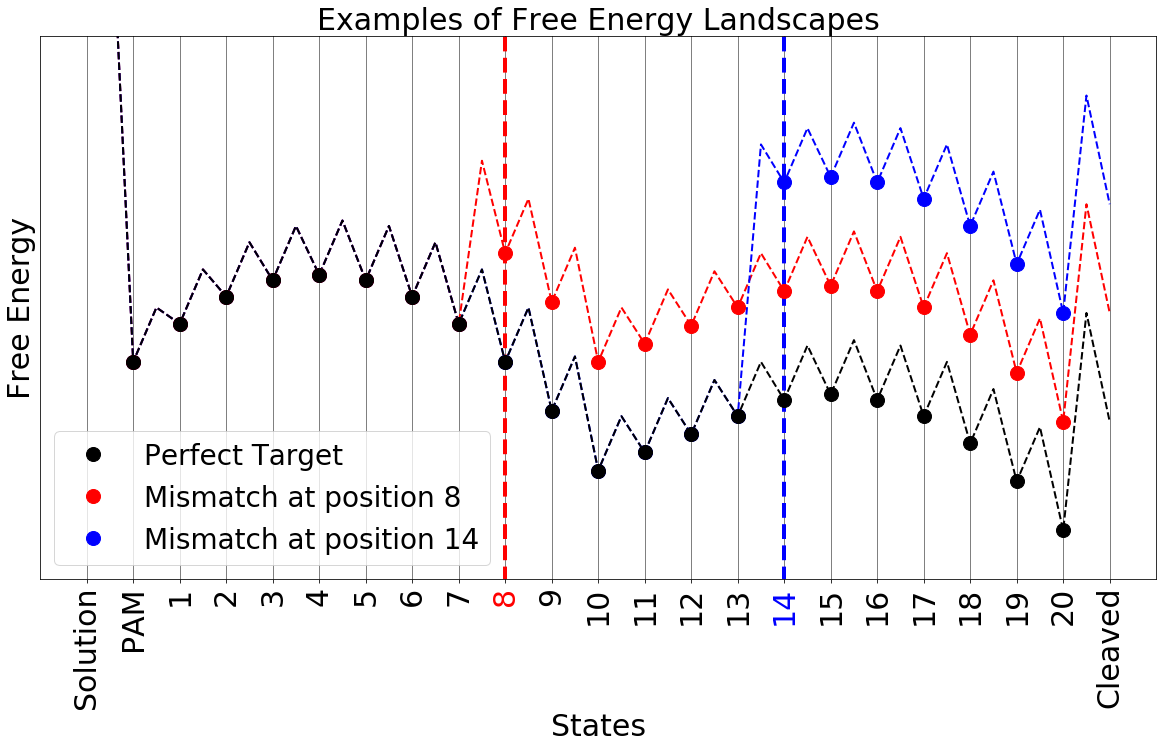

In [4]:
#energies = np.array([20.,1., 4., 6.3, 7.7, 8.2, 8.2, 7.6, 6.5, 4.7,3.4,1.6,0.,0.,3.2,4.,3.6,2.6,1.6,0.6,-0.6,-5.])
#energies = np.array([20.,10.,9.,8.,7.,6.,5.,4.,3.,2.,1.,0.,-1.,-2.,-3.,-4.,-5.,-6.,-7.,-8.,-9.,-10.,])
energies = np.ones(22)
energies[0] = 20.

#for i in range(1,22):
#    energies[i] = (100.-1./energies[i]*(float(i)-5)**(2))/100.

for i in range(1,12):
    energies[i] = (36.-(float(i)-5.)**2)/10.
    
for i in range(14,22):
    energies[i] = (14.-(float(i)-16.)**2)/10.
    
energies[12] = (2*energies[11]+energies[14])/3.
energies[13] = (energies[11]+2*energies[14])/3.

energies2 = energies.copy()
energies2[9:] = 2.+energies2[9:]
energies3 = energies.copy()
energies3[15:] = 4.+energies3[15:]


plt.figure(figsize=[20,10])

trans = []
trans2 = []
trans3 = []
trans.append(11.)
trans2.append(11.)
trans3.append(11.)
height = 1.0
for i in range(len(energies)-1):
    trans.append(energies[i+1])
    trans.append(energies[i+1]+height)
    trans2.append(energies2[i+1])
    trans2.append(energies2[i+1]+height)
    trans3.append(energies3[i+1])
    trans3.append(energies3[i+1]+height)

trans2[16] = 2.+trans2[16]
trans3[28] = 4.+trans3[28]
    
trans[-1] = 4*height+trans[-2]
trans2[-1] = 4*height+trans2[-2]
trans3[-1] = 4*height+trans3[-2]

trans.append(trans[-1]-2.)
trans2.append(trans2[-1]-2.)
trans3.append(trans3[-1]-2.)

plt.plot(np.arange(.5,22.5,0.5),trans2,linewidth=2.,linestyle='--',color='r')
plt.plot(np.arange(.5,22.5,0.5),trans3,linewidth=2.,linestyle='--',color='b')
plt.plot(np.arange(.5,22.5,0.5),trans,linewidth=2.,linestyle='--',color='k')


plt.axis([-1,23,-2,8])
plot1 = plt.plot(range(0,22),energies3,marker='o',markersize=14,color='b',linewidth=0.,label='Mismatch at position 14')
plot2 = plt.plot(range(0,22),energies2,marker='o',markersize=14,color='r',linewidth=0.,label='Mismatch at position 8')
plot3 = plt.plot(range(0,22),energies,marker='o',markersize=14,color='k',linewidth=0.,label='Perfect Target')
plt.xticks(range(0,23),['Solution','PAM'] + range(1,21) + ['Cleaved'],fontsize=30,rotation='vertical')
plt.gca().get_xticklabels()[9].set_color('r')
plt.gca().get_xticklabels()[15].set_color('b')
plt.yticks([],[])
plt.ylabel('Free Energy',fontsize=30)
plt.xlabel('States',fontsize=30)
plt.vlines(range(0,23),15,-8,color='grey',linewidth=1.);
plt.vlines([9],15,-8,color='r',linewidth=4.,linestyle='--')
plt.vlines([15],15,-8,color='b',linewidth=4.,linestyle='--')
plt.legend(handles=[plot3[0],plot2[0],plot1[0]],fontsize=28)
plt.title('Examples of Free Energy Landscapes',fontsize=30)



In [5]:
def separate_PAM(S, Cas='Cas9'):
    if Cas == 'Cas9':
        PAM_len = 3
        PAM = S[-PAM_len:]
        s = S[0:-PAM_len]
        s = s[::-1]
        #s = s[0:-1]
        canonical = False
        if PAM[1:] == 'GG':
            canonical = True
    if Cas == 'Cas12a':
        PAM_len = 4
        PAM = S[:PAM_len]
        s = S[PAM_len:]
        s = s[0:-3]
        canonical = False
        if (PAM[:3] == 'TTT') & (PAM[3] != 'T'):
            canonical = True
    return PAM, s, canonical

C:\Users\stijn\Anaconda2\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\stijn\Anaconda2\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\stijn\Anaconda2\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


-3.539342663677345
-3.539342663677345


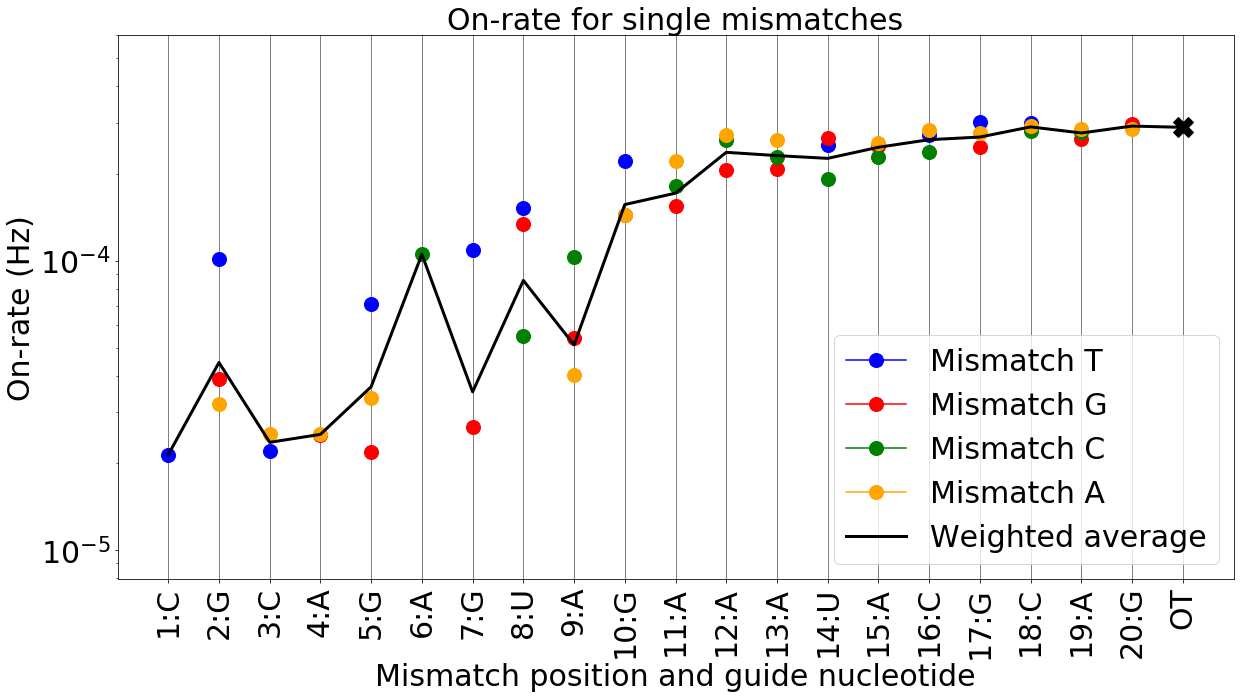

In [6]:
import sys
sys.path.append('../code_Boyle/')
sys.path.append('../code_general_Finkelsteinlab/')
import Boyle_data_processing as boy
import Process_SeqLibrary_Finkelsteinlab as fin
import Nucleaseq_data_processing as nuc
reload(fin)
reload(boy)
reload(nuc)

xdata,ydata,yerr = boy.prepare_multiprocessing('1','../Data_Boyle/',True,False,False)
xdatac,ydatac,yerrc = nuc.prepare_multiprocessing_combined('1','WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv','../Data_Boyle/','../data_nucleaseq_Finkelsteinlab/targetE/',True)
single = []
error = []
i = 1
for i in range(1,21):
    for j in range(len(xdatac)):
        if len(xdatac[j])==1 and xdatac[j][0]==i:
            single.append(ydatac[j][1][0])
            error.append(np.std(ydata[j][1]))

data = pd.read_csv('../Data_Boyle/' + 'second_fit_data.summarized.on.1nM.rep1'  + '.txt', delimiter='\t')
data = data[data['nmut'] < 3][['mutations', 'slope', 'se','seq']]
data['PAM'] = data['seq'].apply(lambda s: separate_PAM(s)[2])
data['seq'] = data['seq'].apply(lambda s: separate_PAM(s)[1])
data = data[data['PAM']]
data['Mutation_Positions'] = data['mutations'].apply(boy.get_pos)
data['number'] = data['Mutation_Positions'].apply(len)
iets = data.loc[44,'Mutation_Positions']

guide_sequenceE = 'CGCAGAGUAGAAAUACGCAG'
label = []
for i in range(20):
    label.append(str(i+1) + ':' + guide_sequenceE[i])
plt.figure(figsize=[20,10])
for j in range(1,21):
    position = j
    mismatch = data[data['number']==1]
    mismatch['Mutation_Positions'] = mismatch['Mutation_Positions'].apply(lambda x: x[0])
    mismatch = mismatch[mismatch['Mutation_Positions']==position]
    sequences = mismatch['seq']
    sequences = np.array(sequences)
    rates = np.array(mismatch.slope)
    A = list()
    G = list()
    C = list()
    T = list()

    for i in range(len(rates)):
        #if guide_sequenceD[position-1] == 'C':
            if sequences[i][position-1] == 'T':
                T.append(rates[i])
            elif sequences[i][position-1] == 'A':
                A.append(rates[i])
            elif sequences[i][position-1] == 'G':
                G.append(rates[i])
            elif sequences[i][position-1] == 'C':
                C.append(rates[i])
            else:
                print 'dubbelhuh'
            
    plot1 = plt.plot(np.ones(len(A))*position,A,color='blue',marker='o',markersize=14,label='Mismatch T')
    plot2 = plt.plot(np.ones(len(C))*position,C,color='red',marker='o',markersize=14,label='Mismatch G')
    plot3 = plt.plot(np.ones(len(G))*position,G,color='green',marker='o',markersize=14,label='Mismatch C')
    plot4 = plt.plot(np.ones(len(T))*position,T,color='orange',marker='o',markersize=14,label='Mismatch A')

    
ot = data[data['number']==0]
rates = np.array(ot['slope'])
rates = np.mean(rates)
single.append(rates)
error.append(yerrc[0][1][0])

plt.semilogy(21,rates,color='k',marker='X',markersize=20)
    
plot5 = plt.plot(range(1,22),single,'k',label='Weighted average',linewidth=3.)
plt.vlines(range(1,22),10**-6,10**-3,color='grey',linewidth=1.)
plt.legend(handles=[plot1[0],plot2[0],plot3[0],plot4[0],plot5[0]], fontsize=30,loc='lower right')
plt.title('On-rate for single mismatches', fontsize=30)
plt.xlabel('Mismatch position and guide nucleotide', fontsize=30)
plt.ylabel('On-rate (Hz)', fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(range(1,22),label + ['OT'],fontsize=30,rotation='vertical');
plt.axis([0, 22, 10**-5.1, 0.0006])
print np.log10(single[-1])
print np.log10(rates)

C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in power
C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in power
C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in power
C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in power
C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in power
C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in power
C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in power
C:\Users\stijn\Anaconda2\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in power
C:\Users\stijn\Anaconda2\lib\site-packag

[0.07615098 0.15040334 0.07540858 0.08025619 0.14270158 0.3641049
 0.09891732 0.25619814 0.11264615 0.18678325 0.2691442  0.51886542
 0.60827812 0.60139596 0.66324822 0.67688969 0.74588003 0.9547276
 0.93247598        nan]


[0, 21, 0, 1.1]

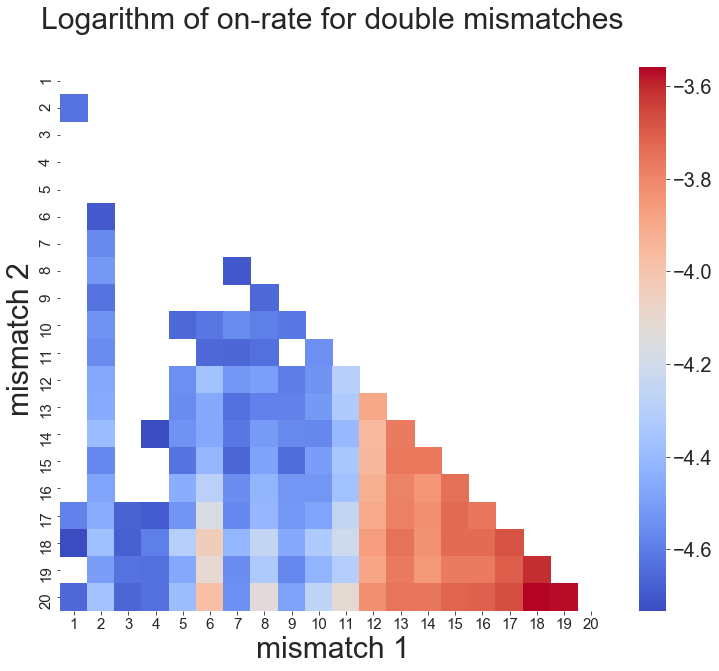

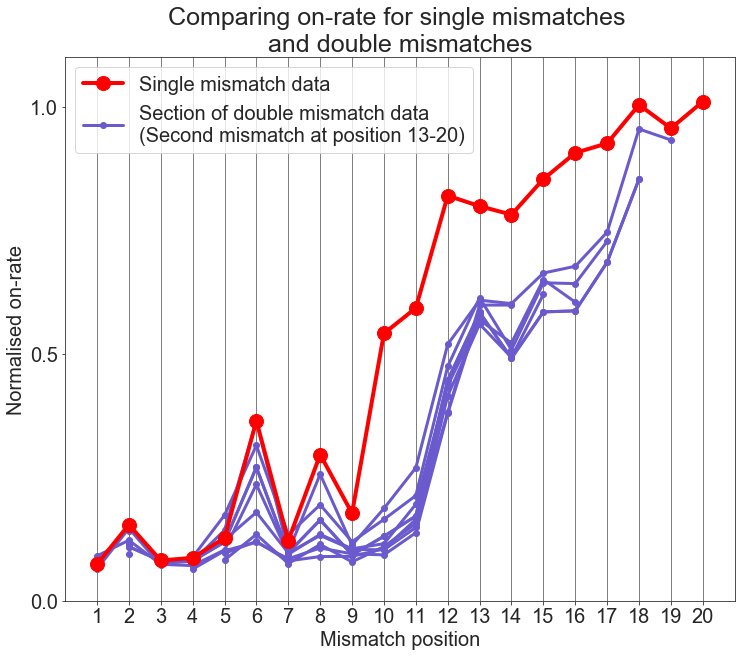

In [7]:
import sys
sys.path.append('../code_Boyle/')
sys.path.append('../code_general_Finkelsteinlab/')
import Process_SeqLibrary_Finkelsteinlab as fin
import Nucleaseq_data_processing as nuc
reload(fin)
reload(boy)
reload(nuc)
import seaborn as sns
sns.set_style('ticks')
current_colors = sns.color_palette()

xdata,ydata,yerr = nuc.prepare_multiprocessing_combined('1','WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv','../Data_Boyle/','../data_nucleaseq_Finkelsteinlab/targetE/',True)
on_double = np.zeros([20,20])

for i in range(len(xdata)):
    if len(xdata[i])==2:
        if len(ydata[i][1])==0:
            on_double[xdata[i][0]-1][xdata[i][1]-1] = np.nan
            on_double[xdata[i][1]-1][xdata[i][0]-1] = np.nan
        else:
            on_double[xdata[i][0]-1][xdata[i][1]-1] = np.nan#np.log10(np.average(ydata[i][1],weights=np.reciprocal(yerr[i][1])))
            on_double[xdata[i][1]-1][xdata[i][0]-1] = np.log10(np.average(ydata[i][1],weights=np.reciprocal(yerr[i][1])))

on_double_df = pd.DataFrame(on_double, index=range(1,21), columns=range(1,21))
for i in range(1,21):
    on_double_df[i].loc[i]=np.nan
    
compare_single13 = 10**(np.array(on_double_df.transpose()[:][12]-np.log10(rates)))
compare_single14 = 10**(np.array(on_double_df.transpose()[:][13]-np.log10(rates)))
compare_single15 = 10**(np.array(on_double_df.transpose()[:][14]-np.log10(rates)))
compare_single16 = 10**(np.array(on_double_df.transpose()[:][15]-np.log10(rates)))
compare_single17 = 10**(np.array(on_double_df.transpose()[:][16]-np.log10(rates)))
compare_single18 = 10**(np.array(on_double_df.transpose()[:][17]-np.log10(rates)))
compare_single19 = 10**(np.array(on_double_df.transpose()[:][18]-np.log10(rates)))
compare_single20 = 10**(np.array(on_double_df.transpose()[:][19]-np.log10(rates)))
compare_single21 = 10**(np.array(on_double_df.transpose()[:][20]-np.log10(rates)))

print compare_single21

plt.figure(figsize=[12.2,10])
ax = sns.heatmap(on_double_df,cmap='coolwarm', cbar=True)
plt.xlabel('mismatch 1', fontsize=30)
plt.ylabel('mismatch 2', fontsize=30)
plt.title('Logarithm of on-rate for double mismatches\n', fontsize=30)
plt.xticks(np.arange(0.5,20.5),range(1,21),fontsize=15)
plt.yticks(np.arange(0.5,20.5),range(1,21),fontsize=15)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

plt.figure(figsize=[12,10])
#plt.plot(range(1,21),compare_single13,'slateblue',linewidth=3.,marker='o')
plt.plot(range(1,21),compare_single14,'slateblue',linewidth=3.,marker='o')
plt.plot(range(1,21),compare_single15,'slateblue',linewidth=3.,marker='o')
plt.plot(range(1,21),compare_single16,'slateblue',linewidth=3.,marker='o')
plt.plot(range(1,21),compare_single17,'slateblue',linewidth=3.,marker='o')
plt.plot(range(1,21),compare_single18,'slateblue',linewidth=3.,marker='o')
plt.plot(range(1,21),compare_single19,'slateblue',linewidth=3.,marker='o')
plt.plot(range(1,21),compare_single20,'slateblue',linewidth=3.,marker='o')
plt.plot(range(1,21),compare_single21,'slateblue',linewidth=3.,marker='o')
plot1 = plt.plot(range(1,21),compare_single20,'slateblue',linewidth=3.,marker='o',label='Section of double mismatch data \n(Second mismatch at position 13-20)')
plot2 = plt.plot(range(1,21),(single)[0:20]/rates,'r',linewidth=4.,marker='o',markersize=14,label='Single mismatch data')
plt.legend(handles=[plot2[0],plot1[0]],fontsize=20,loc='upper left')
plt.xticks(range(1,21),range(1,21),fontsize=20);
plt.yticks([0.,0.5,1.],fontsize=20);
plt.xlabel('Mismatch position',fontsize=20)
plt.ylabel('Normalised on-rate', fontsize=20)
plt.vlines(range(1,21),0,1.1,linewidth=1.,color='grey')
plt.title('Comparing on-rate for single mismatches \nand double mismatches', fontsize=25)
plt.axis([0,21,0,1.1])

TypeError: unsupported operand type(s) for ** or pow(): 'int' and 'list'

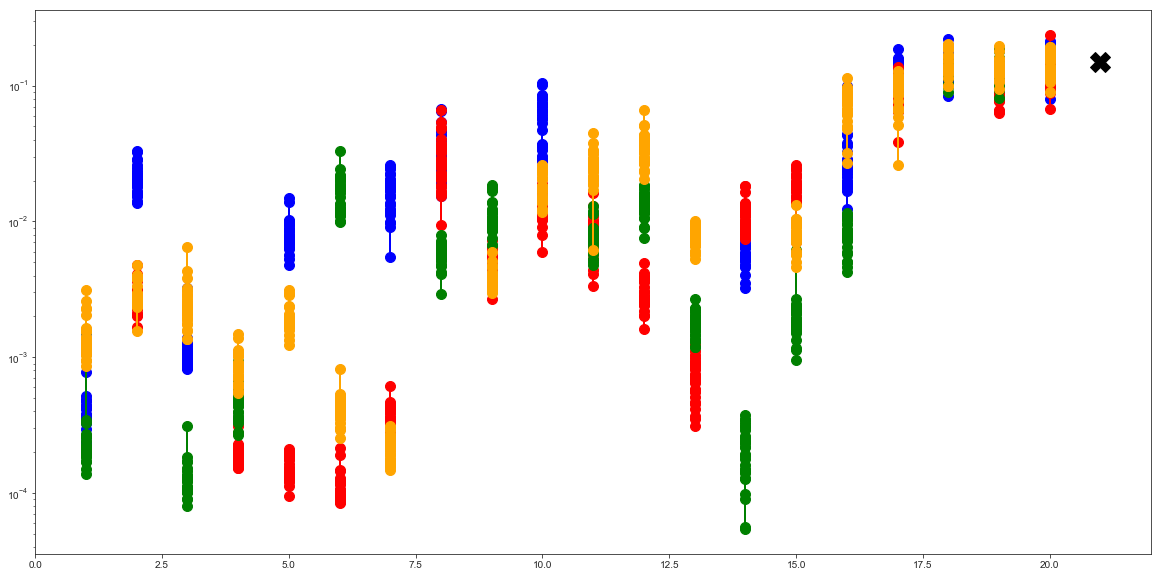

In [11]:
import sys
sys.path.append('../code_Boyle/')
sys.path.append('../code_general_Finkelsteinlab/')
import Boyle_data_processing as boy
import Process_SeqLibrary_Finkelsteinlab as fin
import Nucleaseq_data_processing as nuc
reload(fin)
reload(boy)
reload(nuc)

xdatac,ydatac,yerrc = nuc.prepare_multiprocessing_combined('1','WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv','../Data_Boyle/','../data_nucleaseq_Finkelsteinlab/targetE/',True)
_,ydatas,_ = nuc.prepare_multiprocessing_combined('1','WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv','../Data_Boyle/','../data_nucleaseq_Finkelsteinlab/targetE/',False)
single = []
error = []
i = 1
for i in range(1,21):
    for j in range(len(xdatac)):
        if len(xdatac[j])==1 and xdatac[j][0]==i:
            single.append(10**ydatac[j][0][0])
            error.append(np.std(ydatac[j][0]))

path = '../data_nucleaseq_Finkelsteinlab/targetE/'
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
data = pd.read_csv(path + filename)
data.columns = [c.replace(' ', '_') for c in data.columns]

guide_sequenceE = 'CGCAGAGUAGAAAUACGCAG'
label = []
for i in range(20):
    label.append(str(i+1) + ':' + guide_sequenceE[i])
plt.figure(figsize=[20,10])

for j in range(1,21):
    position = j
    mismatch = data[data.Mutation_Positions == str(position)]
    sequences = mismatch['Sequence'].apply(lambda S: fin.separate_PAM(S)[1])
    sequences = np.array(sequences)
    rates = np.array(mismatch.cleavage_rate)
    A = list()
    G = list()
    C = list()
    T = list()

    for i in range(len(rates)):
            if sequences[i][position-1] == 'T':
                T.append(rates[i])
            elif sequences[i][position-1] == 'A':
                A.append(rates[i])
            elif sequences[i][position-1] == 'G':
                G.append(rates[i])
            elif sequences[i][position-1] == 'C':
                C.append(rates[i])
            else:
                print 'dubbelhuh'
            
    plot1 = plt.plot(np.ones(len(A))*position,A,color='blue',markersize=10,marker='o',label = 'Mismatch T')
    plot2 = plt.plot(np.ones(len(C))*position,C,color='red',markersize=10,marker='o',label='Mismatch G')
    plot3 = plt.plot(np.ones(len(G))*position,G,color='green',markersize=10,marker='o',label='Mismatch C')
    plot4 = plt.plot(np.ones(len(T))*position,T,color='orange',markersize=10,marker='o',label='Mismatch A')


    
single.append(10**ydatac[0][0][0])

plt.semilogy(21,single[-1],color='k',marker='X',markersize=20)

plt.plot(np.ones(len(ydatas[0][0]))*21,ydatas[0][0],color='grey',markersize=10,marker='o')
plot5 = plt.plot(range(1,22),single,'k',label='Weighted average',linewidth=3.)
plt.vlines(range(1,22),10**-5,10**-0.5,color='grey',linewidth=1.)
plt.legend(handles=[plot1[0],plot2[0],plot3[0],plot4[0],plot5[0]], fontsize=30,loc='lower right')
plt.title('Cleavage rate for single mismatches (Target E)', fontsize=30)
plt.xlabel('Mismatch position and guide nucleotide', fontsize=30)
plt.ylabel('Cleavage rate (Hz)', fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(range(1,22),label + ['OT'],fontsize=30,rotation='vertical');

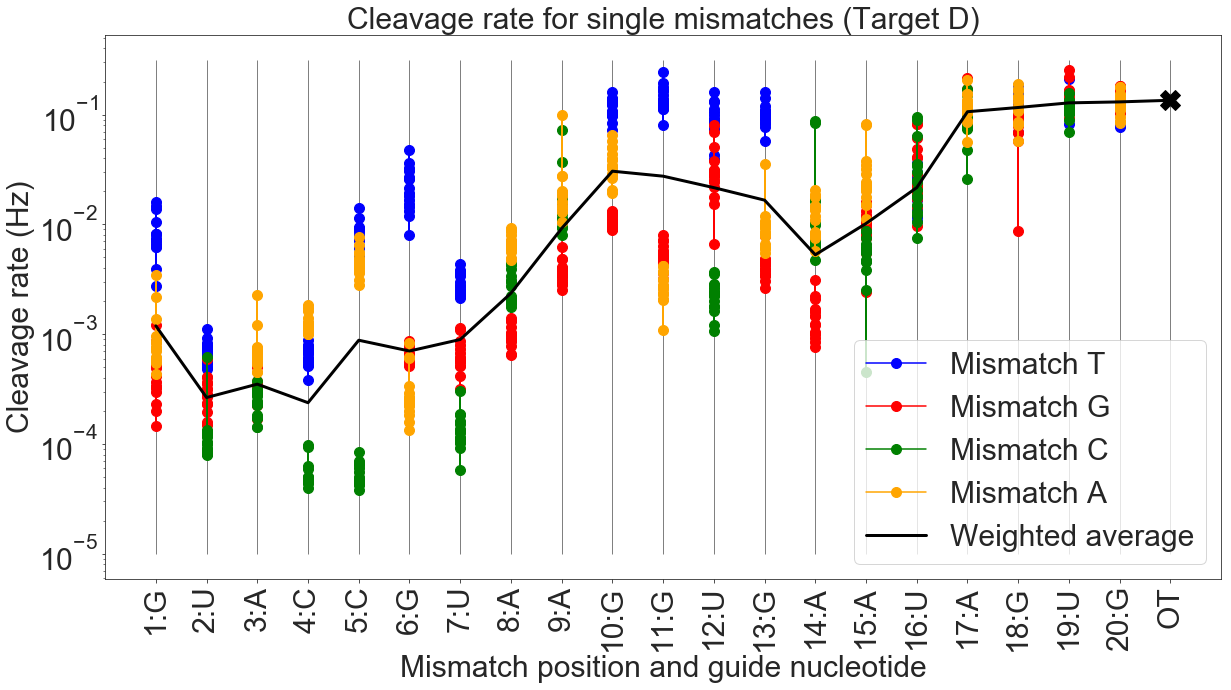

In [11]:
import sys
sys.path.append('../code_Boyle/')
sys.path.append('../code_general_Finkelsteinlab/')
import Boyle_data_processing as boy
import Process_SeqLibrary_Finkelsteinlab as fin
import Nucleaseq_data_processing as nuc
reload(fin)
reload(boy)
reload(nuc)

xdatac,ydatac,yerrc = nuc.prepare_multiprocessing_combined('1','WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv','../Data_Boyle/','../data_nucleaseq_Finkelsteinlab/targetD/',True)
single = []
error = []
i = 1
for i in range(1,21):
    for j in range(len(xdatac)):
        if len(xdatac[j])==1 and xdatac[j][0]==i:
            single.append(10**ydatac[j][0][0])
            error.append(np.std(ydata[j][0]))

path = '../data_nucleaseq_Finkelsteinlab/targetD/'
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
data = pd.read_csv(path + filename)
data.columns = [c.replace(' ', '_') for c in data.columns]

guide_sequenceD = 'GUACCGUAAGGUGAAUAGUG'
label = []
for i in range(20):
    label.append(str(i+1) + ':' + guide_sequenceD[i])
plt.figure(figsize=[20,10])

for j in range(1,21):
    position = j
    mismatch = data[data.Mutation_Positions == str(position)]
    sequences = mismatch['Sequence'].apply(lambda S: fin.separate_PAM(S)[1])
    sequences = np.array(sequences)
    rates = np.array(mismatch.cleavage_rate)
    A = list()
    G = list()
    C = list()
    T = list()

    for i in range(len(rates)):
            if sequences[i][position-1] == 'T':
                T.append(rates[i])
            elif sequences[i][position-1] == 'A':
                A.append(rates[i])
            elif sequences[i][position-1] == 'G':
                G.append(rates[i])
            elif sequences[i][position-1] == 'C':
                C.append(rates[i])
            else:
                print 'dubbelhuh'
            
    plot1 = plt.plot(np.ones(len(A))*position,A,color='blue',markersize=10,marker='o',label = 'Mismatch T')
    plot2 = plt.plot(np.ones(len(C))*position,C,color='red',markersize=10,marker='o',label='Mismatch G')
    plot3 = plt.plot(np.ones(len(G))*position,G,color='green',markersize=10,marker='o',label='Mismatch C')
    plot4 = plt.plot(np.ones(len(T))*position,T,color='orange',markersize=10,marker='o',label='Mismatch A')


    
single.append(10**ydatac[0][0][0])

plt.semilogy(21,single[-1],color='k',marker='X',markersize=20)
    
plot5 = plt.plot(range(1,22),single,'k',label='Weighted average',linewidth=3.)
plt.vlines(range(1,22),10**-5,10**-0.5,color='grey',linewidth=1.)
plt.legend(handles=[plot1[0],plot2[0],plot3[0],plot4[0],plot5[0]], fontsize=30,loc='lower right')
plt.title('Cleavage rate for single mismatches (Target D)', fontsize=30)
plt.xlabel('Mismatch position and guide nucleotide', fontsize=30)
plt.ylabel('Cleavage rate (Hz)', fontsize=30)
plt.yticks(fontsize=30)
plt.xticks(range(1,22),label + ['OT'],fontsize=30,rotation='vertical');

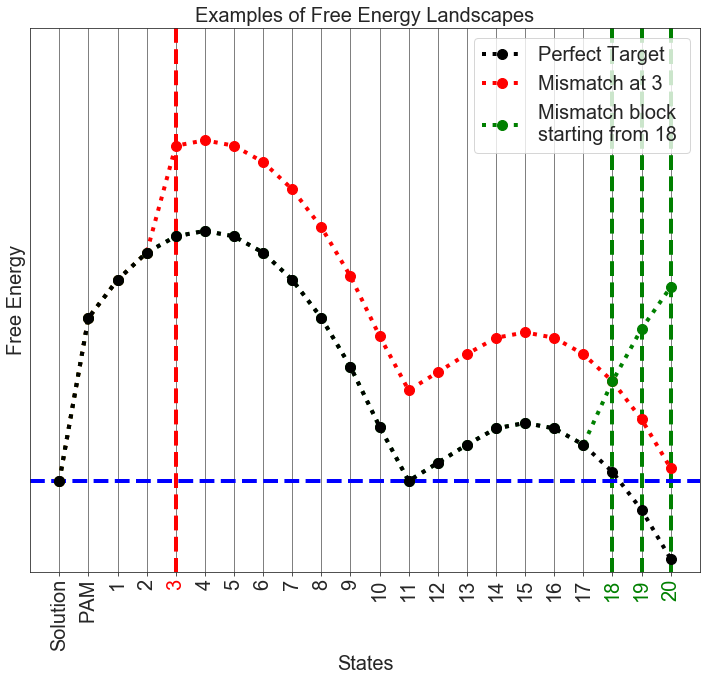

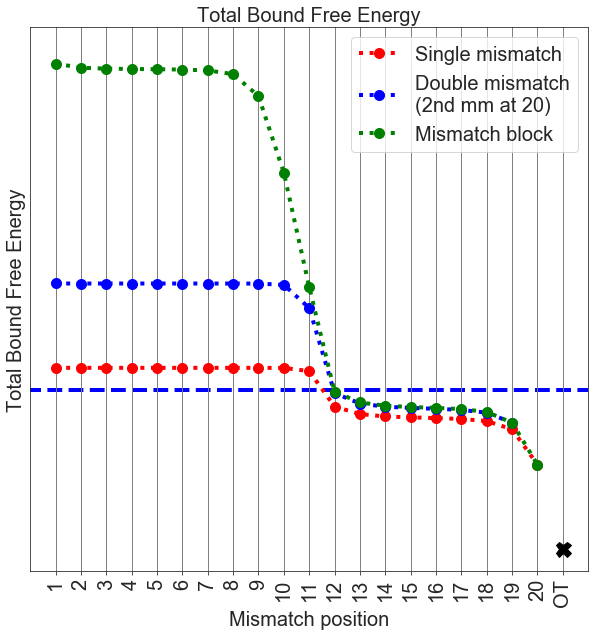

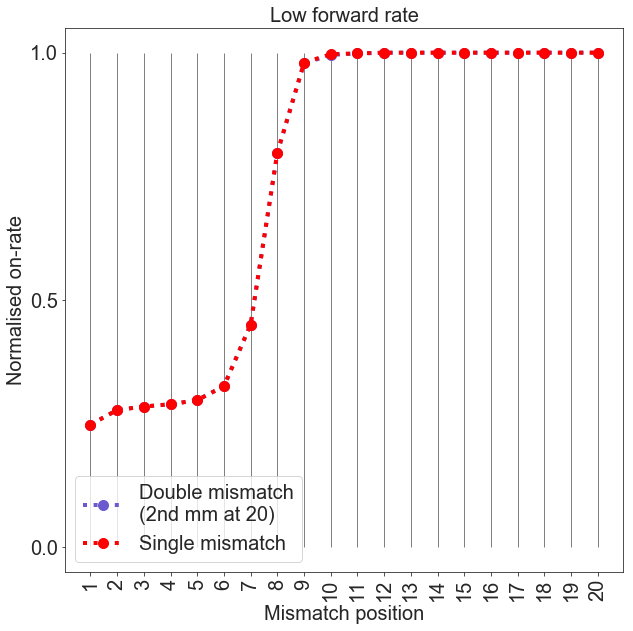

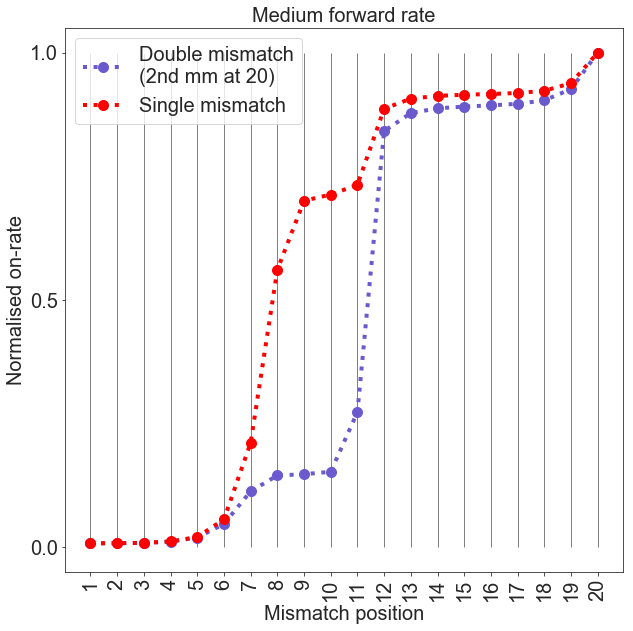

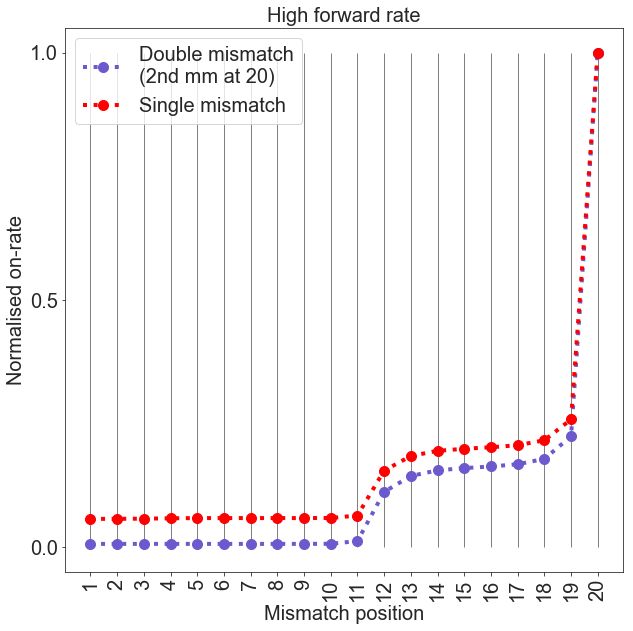

In [93]:
energies = np.ones(22)
energies[0] = 0.

for i in range(1,12):
    energies[i] = (36.-(float(i)-5.)**2)/10.
    
for i in range(14,22):
    energies[i] = (14.-(float(i)-16.)**2)/10.
    
energies[12] = (2*energies[11]+energies[14])/3.
energies[13] = (energies[11]+2*energies[14])/3.
energies[1:] = 1.5*energies[1:]
energies[1:] = energies[1:] + 1.5
energies[12:] = energies[12:] - 2.
#energies[-2] = energies[-2] -2.
#energies[-1] = energies[-1] -3.
energies = 2*energies

energies2 = energies.copy()
energies2[4:] = 5.+energies2[4:]
energies4 = energies.copy()
energies4[-3] = 5.+energies4[-3]
energies4[-2] = 10.+energies4[-2]
energies4[-1] = 15.+energies4[-1]


plt.figure(figsize=[12,10])



plt.axis([-1,22,-5,25])
plot2 = plt.plot(range(0,22),energies2,marker='o',markersize=10,color='r',linewidth=4.,linestyle=':',label='Mismatch at 3')
#plot1 = plt.plot(range(0,22),energies3,marker='o',markersize=14,color='b',linewidth=4.,linestyle=':',label='Mismatch at position 14')
plot4 = plt.plot(range(0,22),energies4,marker='o',markersize=10,color='g',linewidth=4.,linestyle=':',label='Mismatch block \nstarting from 18')
plot3 = plt.plot(range(0,22),energies,marker='o',markersize=10,color='k',linewidth=4.,linestyle=':',label='Perfect Target')
plt.xticks(range(0,22),['Solution','PAM'] + range(1,21),fontsize=20,rotation='vertical')
plt.gca().get_xticklabels()[4].set_color('r')
plt.gca().get_xticklabels()[19].set_color('g')
plt.gca().get_xticklabels()[20].set_color('g')
plt.gca().get_xticklabels()[21].set_color('g')
plt.yticks([],[])
plt.ylabel('Free Energy',fontsize=20)
plt.xlabel('States',fontsize=20)
plt.vlines(range(0,22),25,-8,color='grey',linewidth=1.);
plt.vlines([4],25,-8,color='r',linewidth=4.,linestyle='--')
plt.vlines([19],25,-8,color='g',linewidth=4.,linestyle='--')
plt.vlines([20],25,-8,color='g',linewidth=4.,linestyle='--')
plt.vlines([21],25,-8,color='g',linewidth=4.,linestyle='--')
plt.legend(handles=[plot3[0],plot2[0],plot4[0]],fontsize=20)
plt.title('Examples of Free Energy Landscapes',fontsize=20)
plt.hlines([0],-1,23,linewidth=4., linestyle='--',color='b')

plt.figure(figsize=[10,10])

bound_energy = np.zeros(20)
for i in range(20):
    tempenergies = energies.copy()
    tempenergies[i+2:] = 5. + tempenergies[i+2:]
    free_energytemp = np.zeros(21)
    sumexp = np.exp(-tempenergies[1]) #PAM energy
    free_energytemp[0] = -np.log(sumexp)
    for j in range(2,22):
        sumexp = sumexp + np.exp(-tempenergies[j])
        free_energytemp[j-1] = -np.log(sumexp)
    bound_energy[i] = free_energytemp[-1]
   
bound_energy2 = np.zeros(19)
for i in range(19):
    tempenergies = energies.copy()
    tempenergies[i+2:] = 5. + tempenergies[i+2:]
    tempenergies[-1] = 5. + tempenergies[-1]
    free_energytemp = np.zeros(21)
    sumexp = np.exp(-tempenergies[1]) #PAM energy
    free_energytemp[0] = -np.log(sumexp)
    for j in range(2,22):
        sumexp = sumexp + np.exp(-tempenergies[j])
        free_energytemp[j-1] = -np.log(sumexp)
    bound_energy2[i] = free_energytemp[-1]
    
bound_energy3 = np.zeros(20)
for i in range(20):
    tempenergies = energies.copy()
    for j in range(i+1,21):
        tempenergies[j+1:] = 5. + tempenergies[j+1:]
    free_energytemp = np.zeros(21)
    sumexp = np.exp(-tempenergies[1]) #PAM energy
    free_energytemp[0] = -np.log(sumexp)
    for j in range(2,22):
        sumexp = sumexp + np.exp(-tempenergies[j])
        free_energytemp[j-1] = -np.log(sumexp)
    bound_energy3[i] = free_energytemp[-1]
    
bound_energy_OT = 0.0
free_energytemp = np.zeros(21)
sumexp = np.exp(-energies[1]) #PAM energy
free_energytemp[0] = -np.log(sumexp)
for j in range(2,22):
    sumexp = sumexp + np.exp(-energies[j])
    free_energytemp[j-1] = -np.log(sumexp)
bound_energy_OT = free_energytemp[-1]
    
plt.axis([0,22,-5,10])
plot1 = plt.plot(range(1,21),bound_energy,marker='o',markersize=10,color='r',linewidth=4.,linestyle=':',label='Single mismatch')
plot2 = plt.plot(range(1,20),bound_energy2,marker='o',markersize=10,color='b',linewidth=4.,linestyle=':',label='Double mismatch\n(2nd mm at 20)')
plot3 = plt.plot(range(1,21),bound_energy3,marker='o',markersize=10,color='g',linewidth=4.,linestyle=':',label='Mismatch block')
plot4 = plt.plot(21,bound_energy_OT,marker='X',markersize=15,color='k',linewidth=0.)
plt.hlines([0],-1,23,linewidth=4., linestyle='--',color='b')
plt.xticks(range(1,22),range(1,21)+['OT'],fontsize=20,rotation='vertical');
plt.vlines(range(1,22),11,-5,color='grey',linewidth=1.);
plt.ylabel('Total Bound Free Energy',fontsize=20)
plt.xlabel('Mismatch position',fontsize=20)
plt.legend(handles=[plot1[0],plot2[0],plot3[0]],fontsize=20)
plt.title('Total Bound Free Energy',fontsize=20)
plt.yticks([],[])

model_ID = ['Clv_Saturated_general_energies_v2','general_energies_no_kPR']

epsilonc = np.zeros(20)
for i in range(20):
    epsilonc[i] = -(energies[i+2] - energies[i+1])
parameters = np.zeros(44)
parameters[0] = energies[1]
parameters[1:21] = epsilonc[0:20]
parameters[21:41] = 5*np.ones(20)
parameters[41] = 3.
parameters[42] = 0.
parameters[43] = 4.5

on2=np.ones(20)
on=np.ones(20)
_,OT = clv.calc_clv_on(parameters,model_ID,[],20)

for i in range(1,20):
    mismatch = [i]
    mismatch2 = [i,20]
    _,on[i-1] = clv.calc_clv_on(parameters,model_ID,mismatch,20)/OT
    _,on2[i-1] = clv.calc_clv_on(parameters,model_ID,mismatch2,20)/OT
    
plt.figure(figsize=[10,10])
plt.plot(range(1,21),on2,marker='o',markersize=10,color='slateblue',linewidth=4.,linestyle=':',label='Double mismatch mismatch')
plt.plot(range(1,21),on,marker='o',markersize=10,color='r',linewidth=4.,linestyle=':',label='Single mismatch')
plt.title('Low forward rate',fontsize=20)
plt.yticks([0.,0.5,1.],fontsize=20)
plt.xticks(range(1,21),range(1,21),fontsize=20,rotation='vertical');
plt.vlines(range(1,21),0,1,color='grey',linewidth=1.);
plt.xlabel('Mismatch position',fontsize=20)
plt.ylabel('Normalised on-rate',fontsize=20)
plt.legend(['Double mismatch\n(2nd mm at 20)','Single mismatch'],fontsize=20)

parameters[42] = 3.

on2=np.ones(20)
on=np.ones(20)
_,OT = clv.calc_clv_on(parameters,model_ID,[],20)
for i in range(1,20):
    mismatch = [i]
    mismatch2 = [i,20]
    _,on[i-1] = clv.calc_clv_on(parameters,model_ID,mismatch,20)/OT
    _,on2[i-1] = clv.calc_clv_on(parameters,model_ID,mismatch2,20)/OT
    
plt.figure(figsize=[10,10])
plt.plot(range(1,21),on2,marker='o',markersize=10,color='slateblue',linewidth=4.,linestyle=':',label='Double mismatch mismatch')
plt.plot(range(1,21),on,marker='o',markersize=10,color='r',linewidth=4.,linestyle=':',label='Single mismatch')
plt.title('Medium forward rate',fontsize=20)
plt.yticks([0.,0.5,1.],fontsize=20)
plt.xticks(range(1,21),range(1,21),fontsize=20,rotation='vertical');
plt.vlines(range(1,21),0,1,color='grey',linewidth=1.);
plt.xlabel('Mismatch position',fontsize=20)
plt.ylabel('Normalised on-rate',fontsize=20)
plt.legend(['Double mismatch\n(2nd mm at 20)','Single mismatch'],fontsize=20)

parameters[42] = 6.

on2=np.ones(20)
on=np.ones(20)
_,OT = clv.calc_clv_on(parameters,model_ID,[],20)

for i in range(1,20):
    mismatch = [i]
    mismatch2 = [i,20]
    _,on[i-1] = clv.calc_clv_on(parameters,model_ID,mismatch,20)/OT
    _,on2[i-1] = clv.calc_clv_on(parameters,model_ID,mismatch2,20)/OT

plt.figure(figsize=[10,10])
plt.plot(range(1,21),on2,marker='o',markersize=10,color='slateblue',linewidth=4.,linestyle=':',label='Double mismatch mismatch')
plt.plot(range(1,21),on,marker='o',markersize=10,color='r',linewidth=4.,linestyle=':',label='Single mismatch')
plt.title('High forward rate',fontsize=20)
plt.yticks([0.,0.5,1.],fontsize=20)
plt.xticks(range(1,21),range(1,21),fontsize=20,rotation='vertical');
plt.vlines(range(1,21),0,1,color='grey',linewidth=1.);
plt.xlabel('Mismatch position',fontsize=20)
plt.ylabel('Normalised on-rate',fontsize=20)
plt.legend(['Double mismatch\n(2nd mm at 20)','Single mismatch'],fontsize=20)

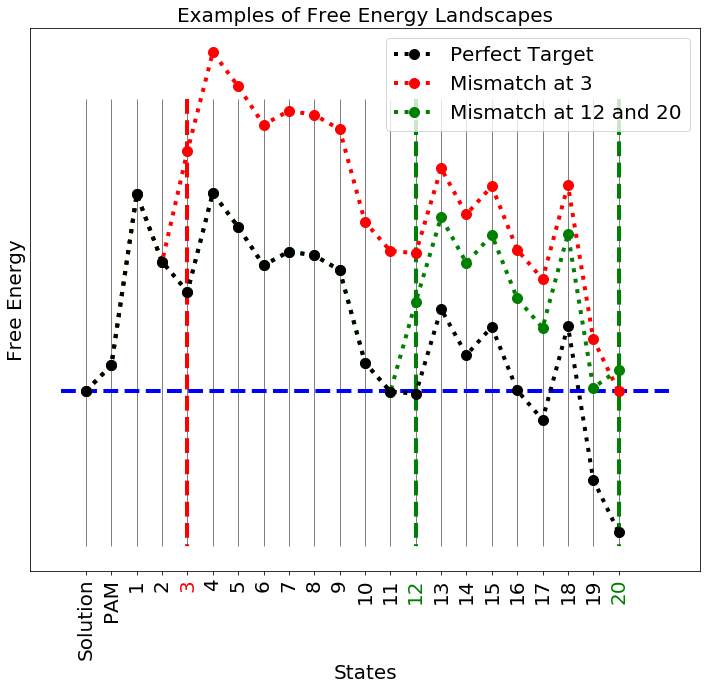

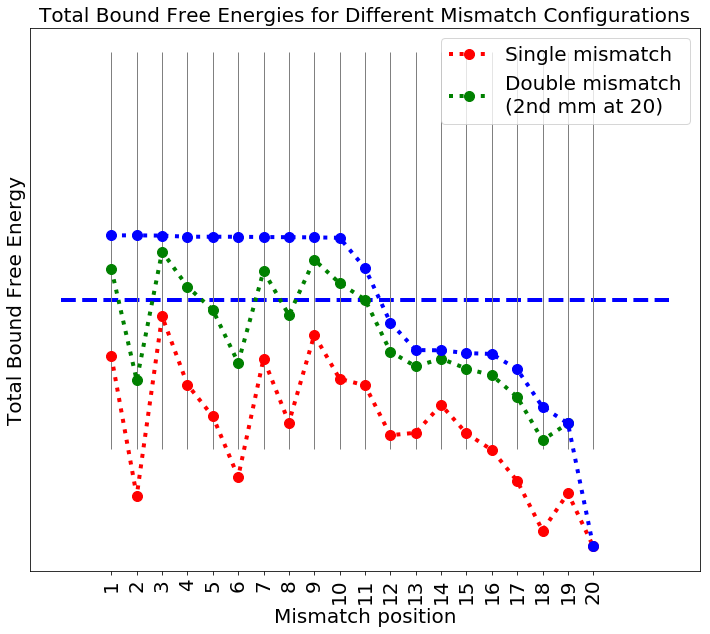

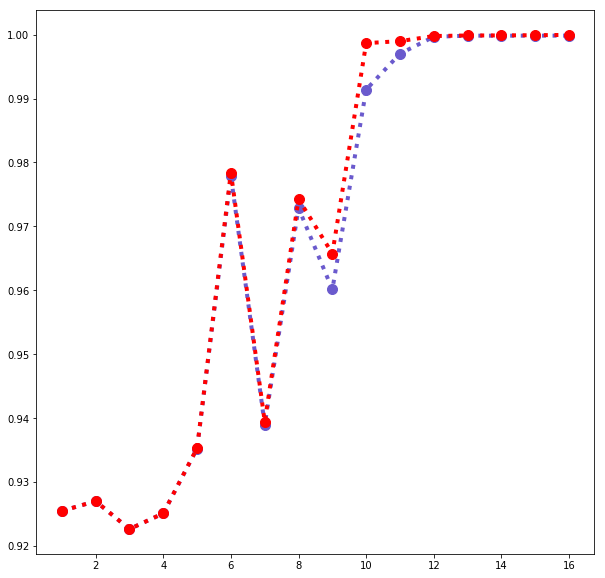

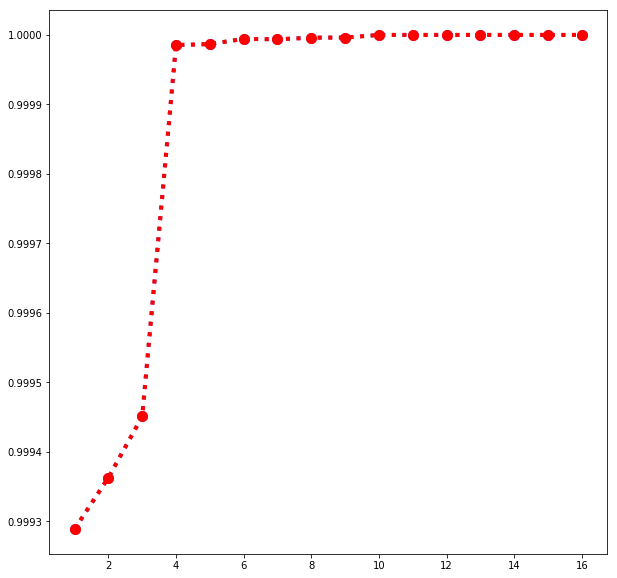

In [12]:
best_fit_boyle = np.loadtxt('best_fit_new.txt')
energies = np.append(np.array([0]),-np.cumsum(best_fit_boyle[0:21]))
epsilonI = best_fit_boyle[21:41]

energies2 = energies.copy()
energies2[4:] = epsilonI[2]+energies2[4:]
energies4 = energies.copy()
energies4[13:] = epsilonI[11]+energies4[13:]
energies4[-1] = epsilonI[-1]+energies4[-1]


plt.figure(figsize=[12,10])



#plt.axis([-1,22,-5,15])
plot2 = plt.plot(range(0,22),energies2,marker='o',markersize=10,color='r',linewidth=4.,linestyle=':',label='Mismatch at 3')
#plot1 = plt.plot(range(0,22),energies3,marker='o',markersize=14,color='b',linewidth=4.,linestyle=':',label='Mismatch at position 14')
plot4 = plt.plot(range(0,22),energies4,marker='o',markersize=10,color='g',linewidth=4.,linestyle=':',label='Mismatch at 12 and 20')
plot3 = plt.plot(range(0,22),energies,marker='o',markersize=10,color='k',linewidth=4.,linestyle=':',label='Perfect Target')
plt.xticks(range(0,22),['Solution','PAM'] + range(1,21),fontsize=20,rotation='vertical')
plt.gca().get_xticklabels()[4].set_color('r')
plt.gca().get_xticklabels()[13].set_color('g')
plt.gca().get_xticklabels()[21].set_color('g')
plt.yticks([],[])
plt.ylabel('Free Energy',fontsize=20)
plt.xlabel('States',fontsize=20)
plt.vlines(range(0,22),15,-8,color='grey',linewidth=1.);
plt.vlines([4],15,-8,color='r',linewidth=4.,linestyle='--')
plt.vlines([13],15,-8,color='g',linewidth=4.,linestyle='--')
plt.vlines([21],15,-8,color='g',linewidth=4.,linestyle='--')
plt.legend(handles=[plot3[0],plot2[0],plot4[0]],fontsize=20)
plt.title('Examples of Free Energy Landscapes',fontsize=20)
plt.hlines([0],-1,23,linewidth=4., linestyle='--',color='b')

plt.figure(figsize=[12,10])

bound_energy = np.zeros(20)
for i in range(20):
    tempenergies = energies.copy()
    tempenergies[i+2:] = epsilonI[i] + tempenergies[i+2:]
    free_energytemp = np.zeros(21)
    sumexp = np.exp(-tempenergies[1]) #PAM energy
    free_energytemp[0] = -np.log(sumexp)
    for j in range(2,22):
        sumexp = sumexp + np.exp(-tempenergies[j])
        free_energytemp[j-1] = -np.log(sumexp)
    bound_energy[i] = free_energytemp[-1]
   
bound_energy2 = np.zeros(19)
for i in range(19):
    tempenergies = energies.copy()
    tempenergies[i+2:] = epsilonI[i] + tempenergies[i+2:]
    tempenergies[-1] = epsilonI[-1] + tempenergies[-1]
    free_energytemp = np.zeros(21)
    sumexp = np.exp(-tempenergies[1]) #PAM energy
    free_energytemp[0] = -np.log(sumexp)
    for j in range(2,22):
        sumexp = sumexp + np.exp(-tempenergies[j])
        free_energytemp[j-1] = -np.log(sumexp)
    bound_energy2[i] = free_energytemp[-1]
    
bound_energy3 = np.zeros(20)
for i in range(20):
    tempenergies = energies.copy()
    for j in range(i+1,21):
        tempenergies[j+1:] = epsilonI[j-1] + tempenergies[j+1:]
    free_energytemp = np.zeros(21)
    sumexp = np.exp(-tempenergies[1]) #PAM energy
    free_energytemp[0] = -np.log(sumexp)
    for j in range(2,22):
        sumexp = sumexp + np.exp(-tempenergies[j])
        free_energytemp[j-1] = -np.log(sumexp)
    bound_energy3[i] = free_energytemp[-1]
    
#plt.axis([0,21,-2.5,3.5])
plot1 = plt.plot(range(1,21),bound_energy,marker='o',markersize=10,color='r',linewidth=4.,linestyle=':',label='Single mismatch')
plot2 = plt.plot(range(1,20),bound_energy2,marker='o',markersize=10,color='g',linewidth=4.,linestyle=':',label='Double mismatch\n(2nd mm at 20)')
plot3 = plt.plot(range(1,21),bound_energy3,marker='o',markersize=10,color='b',linewidth=4.,linestyle=':',label='Mismatch block')
plt.hlines([0],-1,23,linewidth=4., linestyle='--',color='b')
plt.xticks(range(1,21),range(1,21),fontsize=20,rotation='vertical');
plt.vlines(range(1,21),5,-3,color='grey',linewidth=1.);
plt.ylabel('Total Bound Free Energy',fontsize=20)
plt.xlabel('Mismatch position',fontsize=20)
plt.legend(handles=[plot1[0],plot2[0]],fontsize=20)
plt.title('Total Bound Free Energies for Different Mismatch Configurations',fontsize=20)
plt.yticks([],[])

epsilonc = np.zeros(20)
for i in range(20):
    epsilonc[i] = -(energies[i+2] - energies[i+1])
parameters = np.zeros(44)
parameters[0] = 1.1*energies[1]
parameters[1:21] = 1.6*epsilonc[0:20]
parameters[21:41] = best_fit_boyle[21:41]
parameters[41] = best_fit_boyle[-2]
parameters[42] = best_fit_boyle[-1]
parameters[43] = 4.5

on2=np.zeros(16)
on=np.zeros(16)
for i in range(1,17):
    mismatch = [i]
    mismatch2 = [i,17]
    _,on[i-1] = clv.calc_clv_on(parameters,model_ID,mismatch,20)
    _,on2[i-1] = clv.calc_clv_on(parameters,model_ID,mismatch2,20)
    
_,OT = clv.calc_clv_on(parameters,model_ID,[],20)
    
plt.figure(figsize=[10,10])
plt.plot(range(1,17),on2/OT,marker='o',markersize=10,color='slateblue',linewidth=4.,linestyle=':',label='Double mismatch mismatch')
plt.plot(range(1,17),on/OT,marker='o',markersize=10,color='r',linewidth=4.,linestyle=':',label='Single mismatch')

parameters[42] = 0.

on2=np.zeros(16)
on=np.zeros(16)
for i in range(1,17):
    mismatch = [i]
    mismatch2 = [i,17]
    _,on[i-1] = clv.calc_clv_on(parameters,model_ID,mismatch,20)
    _,on2[i-1] = clv.calc_clv_on(parameters,model_ID,mismatch2,20)
    
_,OT = clv.calc_clv_on(parameters,model_ID,[],20)
    
plt.figure(figsize=[10,10])
plt.plot(range(1,17),on2/OT,marker='o',markersize=10,color='slateblue',linewidth=4.,linestyle=':',label='Double mismatch mismatch')
plt.plot(range(1,17),on/OT,marker='o',markersize=10,color='r',linewidth=4.,linestyle=':',label='Single mismatch')